In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from apriltag import apriltag

In [2]:
def annotate_detections(img, detections, thickness=2):
    '''
    Add annotations of the AprilTag detection results on the input image.

    Args:
        img (numpy.ndarray): The image on which detection results will be annotated.
        detections (tuple): The tuple containing dictionaries of AprilTag detection results after running detector.detect().
        thickness (int): Thickness of annotation boxes and texts.

    Returns:
        None

    Example Usage:
        annotate_detections(img, detections)
    '''

    # Loop through each detection in the input detection list
    for detection in detections:

        # Define the pixel coordinates of the four corners of the quadrilateral
        corners = detection['lb-rb-rt-lt'].astype(np.int32)

        # Reshape the corners to a 2D array of shape (4, 1, 2)
        corners = corners.reshape((-1, 1, 2))

        # Draw a box around the quadrilateral on the input image
        cv2.polylines(img, [corners], True, (0, 0, 255), thickness) # BGR

        # Define the text to be displayed
        text = f"id: {detection['id']}"

        # Define the pixel coordinates of the text on the image
        loc = detection['center'].astype(np.int32)

        # Draw the text on the input image at the specified location
        cv2.putText(img, text, loc, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), thickness) # BGR

### Detection example on the non-nested layout (tag36h11)

({'hamming': 0, 'margin': 238.30357360839844, 'id': 0, 'center': array([72.43795771, 72.28760947]), 'lb-rb-rt-lt': array([[ 36.79473495, 107.91892242],
       [107.91864014, 107.86256409],
       [107.86240387,  36.875     ],
       [ 37.11919022,  36.875     ]])}, {'hamming': 0, 'margin': 225.59130859375, 'id': 1, 'center': array([18.89292052, 18.92812496]), 'lb-rb-rt-lt': array([[12.10524654, 25.875     ],
       [25.875     , 25.875     ],
       [25.875     , 11.78228474],
       [11.58363628, 11.65569496]])}, {'hamming': 0, 'margin': 213.47293090820312, 'id': 2, 'center': array([ 18.89536543, 125.88972387]), 'lb-rb-rt-lt': array([[ 11.87689495, 132.875     ],
       [ 25.875     , 132.875     ],
       [ 25.875     , 118.94309998],
       [ 11.87940025, 118.86808777]])}, {'hamming': 0, 'margin': 226.0176239013672, 'id': 3, 'center': array([125.9097324, 125.8717151]), 'lb-rb-rt-lt': array([[118.86940002, 132.875     ],
       [132.875     , 132.875     ],
       [132.875     , 118.

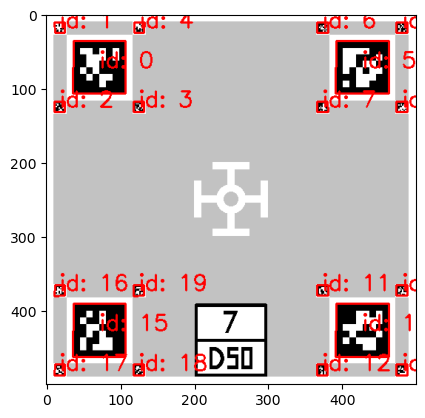

In [3]:
# Load an image
im_path = '../img/non_nested_TLOF_resized.png'
im = cv2.imread(im_path, cv2.IMREAD_COLOR)
im = cv2.resize(im, (500,500))

# Create an Apriltag detector
detector = apriltag("tag36h11")

# Detect Apriltags (Beware: input image data should be in grayscale)
detections = detector.detect(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))

# Print detection results
print(detections)

# Plot detection results
annotate_detections(im, detections, thickness=2)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

### Detection example on the nested layout (tagCustom52h12)

({'hamming': 0, 'margin': 246.20689392089844, 'id': 1, 'center': array([149.26117758, 149.22676731]), 'lb-rb-rt-lt': array([[126.5975647 , 171.92407227],
       [171.92478943, 171.85636902],
       [171.85717773, 126.5971756 ],
       [126.33094025, 126.33094025]])}, {'hamming': 0, 'margin': 257.27679443359375, 'id': 2, 'center': array([250.40199288, 250.22479   ]), 'lb-rb-rt-lt': array([[ 78.5535965 , 422.20916748],
       [422.20379639, 421.8604126 ],
       [421.86828613,  78.62281799],
       [ 78.30304718,  78.29231262]])})


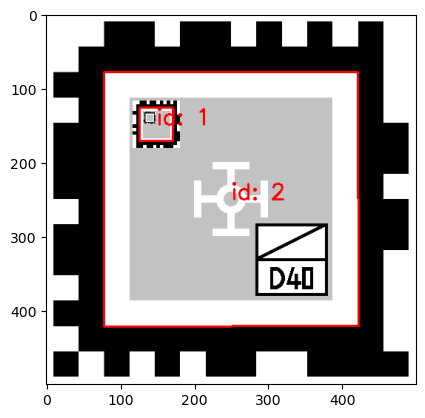

In [4]:
# Load an image
im_path = '../img/nested_TLOF_resized.png'
im = cv2.imread(im_path, cv2.IMREAD_COLOR)
im = cv2.resize(im, (500,500))

# Create an Apriltag detector
detector = apriltag("tagCustom52h12")

# Detect Apriltags (Beware: input image data should be in grayscale)
detections = detector.detect(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))

# Print detection results
print(detections)

# Plot detection results
annotate_detections(im, detections, thickness=2)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))